In [58]:
# Handling imports

import pandas as pd
import matplotlib.pyplot as plt
from zlib import crc32
import numpy as np
import plotly.express as px

# Binding datas

vehicles_data = pd.read_csv("./vehicles.csv")

# Printing datas overview

vehicles_data.head()
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61941 entries, 0 to 61940
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            61941 non-null  int64  
 1   region        61941 non-null  object 
 2   price         61941 non-null  int64  
 3   year          61941 non-null  float64
 4   manufacturer  61941 non-null  object 
 5   model         61941 non-null  object 
 6   condition     61941 non-null  object 
 7   cylinders     61941 non-null  object 
 8   fuel          61941 non-null  object 
 9   odometer      61941 non-null  float64
 10  title_status  61941 non-null  object 
 11  transmission  61941 non-null  object 
 12  drive         61941 non-null  object 
 13  size          61941 non-null  object 
 14  type          61941 non-null  object 
 15  paint_color   61941 non-null  object 
 16  state         61941 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 8.0+ MB


In [59]:
# Grouping data by states

data_grouped_states = vehicles_data.copy()

data_grouped_states = data_grouped_states.groupby("state",as_index=False).count()
data_grouped_states["state"] = data_grouped_states["state"].str.upper() # Capitalizes states for the map

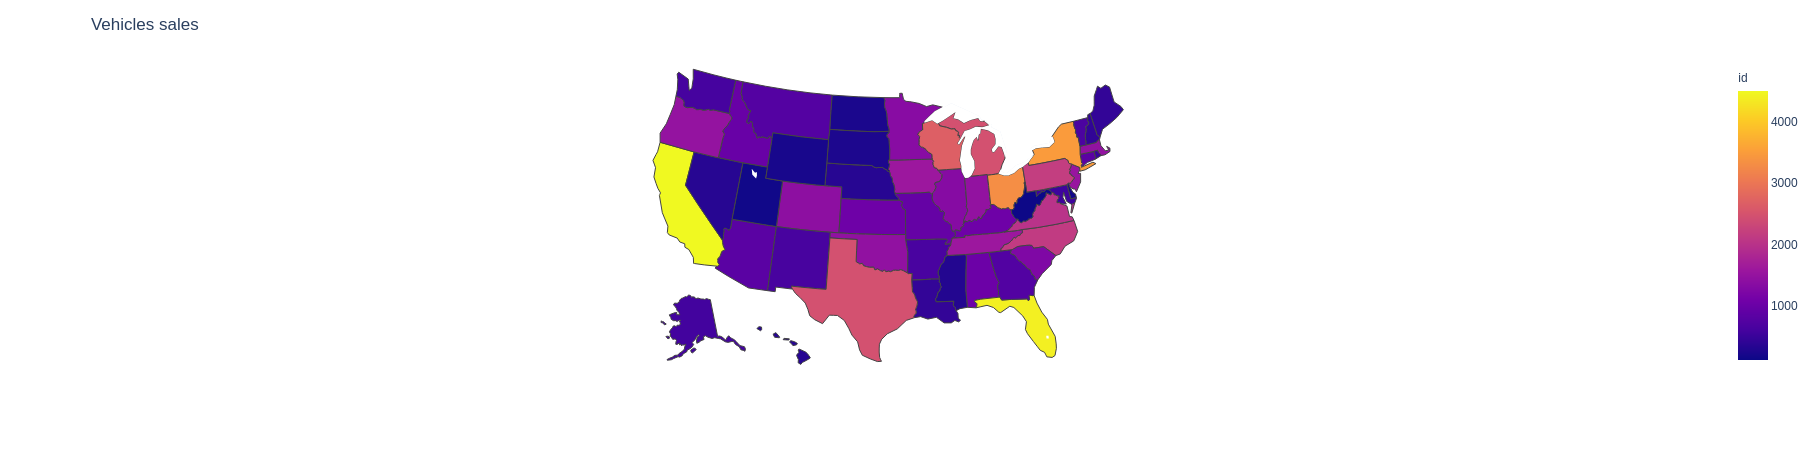

In [60]:
#Plotting heatmap of number of sales by state

fig = px.choropleth(data_grouped_states,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="id",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Vehicles sales', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.show()  # Output

In [62]:
# Splitting datas for test

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(vehicles_data, test_ratio, id_column):
    ids = vehicles_data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return vehicles_data.loc[~in_test_set], vehicles_data.loc[in_test_set]


train_set, test_set = split_train_test_by_id(vehicles_data, 0.2, "id")

print (len(train_set))
print (len(test_set))

49737
12204
